<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/streetlifting-analysis/blob/main/coefficients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/github/PrzemyslawSarnacki/streetlifting-analysis/blob/main/coefficients.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a> 

In [34]:
import math

# calculate allometric scaling score 
def calculate_as(bodyweight, weight_lifted):
  return weight_lifted * bodyweight ** (-2/3)

def calculate_wilks(bodyweight, weight_lifted):
  result = weight_lifted*500/ (-216.0475144 + bodyweight*16.2606339 + bodyweight ** 2 *-0.002388645 + bodyweight ** 3 * -0.00113732 + bodyweight ** 4 * 7.01863E-06 + bodyweight ** 5 * -1.291E-08)
  return result

def calculate_isf(bodyweight, weight_lifted):
  a = 799.81893
  b = 681.45441
  c = 0.00614
  extra_points = 0
  if bodyweight > 95:
    extra_points = (bodyweight - 95) *0.5
  return (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted + extra_points

def calculate_ipf(bodyweight, weight_lifted):
 a = 1199.72839 
 b = 1025.18162 
 c = 0.00921
 result = (100/(a - b * math.exp(-c * bodyweight))) * weight_lifted
 return result


In [35]:
def find_weight_lifted(score, bodyweight):
 return score / bodyweight ** (- 2/3)

In [36]:
find_weight_lifted(54.14, 123)

1339.023890753689

In [37]:
import pandas as pd

wilks = []
ipf  = []
isf = []
bodyweight = []
rows = []
for b in range(50, 120):
  isf = (calculate_isf(b, find_weight_lifted(54.14, b)))
  ipf = (calculate_ipf(b, find_weight_lifted(54.14, b)))
  wilks = (calculate_wilks(b, find_weight_lifted(54.14, b)))

  rows.append([b, wilks, isf, ipf])



df = pd.DataFrame(rows, columns=["bodyweight", "wilks", "isf", "ipf"])


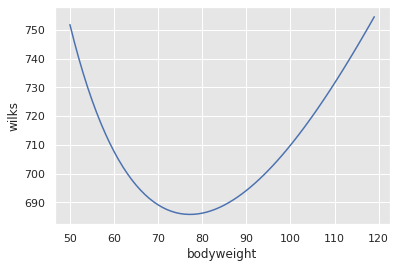

In [38]:
import seaborn as sns
sns.set("notebook", style='ticks', font_scale=1.0)
import matplotlib as mpl
import matplotlib.pyplot as plt

sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.lineplot(
    data=df,
    x="bodyweight", y="wilks", markers=True, dashes=False
)



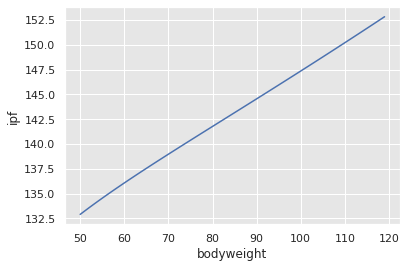

In [39]:
sns.lineplot(
    data=df,
    x="bodyweight", y="ipf", markers=True, dashes=False
)


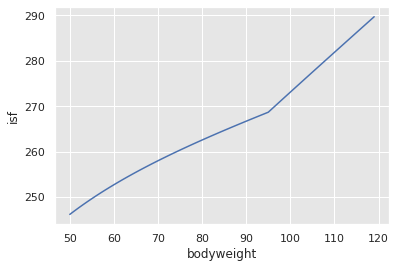

In [40]:
sns.lineplot(
    data=df,
    x="bodyweight", y="isf", markers=True, dashes=False
)

In [41]:
data = {'bodyweight':[68.5, 80.1, 86.9, 100.2],'total':[160+90+120, 170+90+142.5, 210+70+145, 235+60+122.5],'total-sq':[90+120, 90+142.5, 70+145, 60+122.5], 'total+bw':[160+90+120+68.5*2, 170+90+142.5+80.1*2, 210+70+145+86.9*2, 235+60+122.5+100.2*2] }  


best_glogau = pd.DataFrame(data)

In [42]:
best_glogau['wilks'] = best_glogau.apply(lambda row: calculate_wilks(row['bodyweight'], row['total']), axis=1)
best_glogau['isf'] = best_glogau.apply(lambda row: calculate_isf(row['bodyweight'], row['total']), axis=1)
best_glogau['ipf'] = best_glogau.apply(lambda row: calculate_ipf(row['bodyweight'], row['total']), axis=1)
best_glogau['as'] = best_glogau.apply(lambda row: calculate_as(row['bodyweight'], row['total']), axis=1)
best_glogau['wilks+bw'] = best_glogau.apply(lambda row: calculate_wilks(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['isf+bw'] = best_glogau.apply(lambda row: calculate_isf(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['ipf+bw'] = best_glogau.apply(lambda row: calculate_ipf(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['as+bw'] = best_glogau.apply(lambda row: calculate_as(row['bodyweight'], row['total+bw']), axis=1)
best_glogau['wilks-sq'] = best_glogau.apply(lambda row: calculate_wilks(row['bodyweight'], row['total-sq']), axis=1)
best_glogau['isf-sq'] = best_glogau.apply(lambda row: calculate_isf(row['bodyweight'], row['total-sq']), axis=1)
best_glogau['ipf-sq'] = best_glogau.apply(lambda row: calculate_ipf(row['bodyweight'], row['total-sq']), axis=1)
best_glogau['as-sq'] = best_glogau.apply(lambda row: calculate_as(row['bodyweight'], row['total-sq']), axis=1)


best_glogau

,bodyweight,total,total-sq,total+bw,wilks,isf,ipf,as,wilks+bw,isf+bw,ipf+bw,as+bw,wilks-sq,isf-sq,ipf-sq,as-sq
0,68.5,370.0,210.0,507.0,281.968589,105.013524,56.556931,22.100801,386.373174,143.896910,77.498280,30.284070,160.036226,59.602271,32.099879,12.543698
1,80.1,402.5,232.5,562.7,274.570058,105.064339,56.731373,21.660952,383.852352,146.881251,79.311164,30.282280,158.602580,60.689339,32.770296,12.512227
2,86.9,425.0,215.0,598.8,276.373407,106.213017,57.491063,21.662525,389.393874,149.647893,81.001526,30.521224,139.812430,53.731291,29.083714,10.958689
3,100.2,417.5,182.5,617.9,253.883681,99.359810,52.692461,19.352838,375.747848,145.804519,77.984843,28.642201,110.979094,44.896204,23.033232,8.459624
